# SALES PREDICTION USING PYTHON

Task 5 - SALES PREDICTION USING PYTHON

Name of the Intern - Arvinda HB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats
from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pycaret.regression import *

C:\Users\Arvinda H B\AppData\Local\Temp\ipykernel_25460\4095987331.py:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
sales = pd.read_csv("Advertising.csv")

In [3]:
#Checking for null values in Data
sales.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [4]:
#Checking the First Five Values in the Data
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#Checking the Last Five Values in the Data**"""
sales.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
#Dimensions of the Dataset
sales.shape

(200, 5)

In [7]:
#Describing the Dataset
sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Visualization of the Data

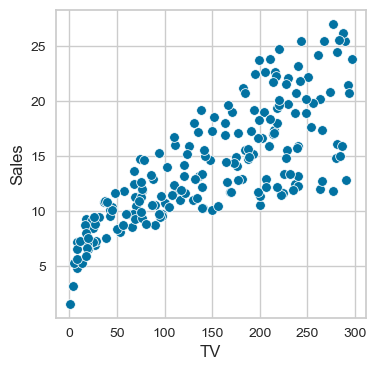

In [8]:
#TV Sales Plotting

plt.figure(figsize=(4,4))
sns.scatterplot(data = sales, x = sales['TV'], y = sales['Sales'])
plt.show()

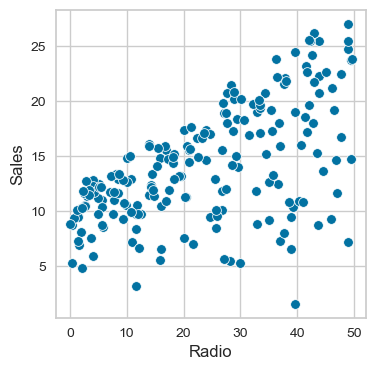

In [9]:
#Radio Sales Plotting

plt.figure(figsize=(4,4))
sns.scatterplot(data = sales, x = sales['Radio'], y = sales['Sales'])
plt.show()

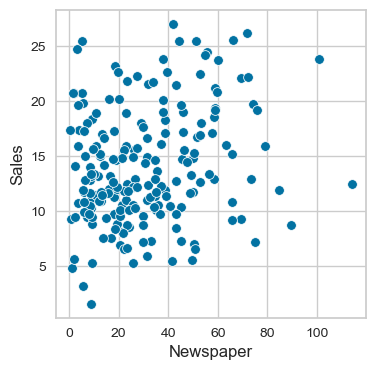

In [10]:
#Radio Sales Plotting

plt.figure(figsize=(4,4))
sns.scatterplot(data = sales, x = sales['Newspaper'], y = sales['Sales'])
plt.show()

# Data Modeling

In [11]:
#Splitting the Dataset into Training and Testing

X = sales.drop(['Unnamed: 0','Sales'], axis=1)
Y = sales['Sales']
print("X Dimention: ", X.shape)
print("Y Dimention: ", Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=25)

X Dimention:  (200, 3)
Y Dimention:  (200,)


In [12]:
#Checking the Dimensions of Training and Testing Data

print("X_Train Shape:", X_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Train Shape:", X_train.shape)
print("Y_Test Shape:", Y_test.shape)

X_Train Shape: (150, 3)
X_Test Shape: (50, 3)
Y_Train Shape: (150, 3)
Y_Test Shape: (50,)


# Model Building

In [13]:
#Creating the Model

model = LinearRegression()
model.fit(X_train,Y_train)
pred = model.predict(X_test)

# Model Testing

In [14]:
#Testing the Model

print('MAE: ', metrics.mean_absolute_error(pred,Y_test))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(pred,Y_test)))
print('R-Squared: ', metrics.r2_score(pred,Y_test))

MAE:  1.3589661756175428
RMSE:  1.7670302705342993
R-Squared:  0.867331723648149


# Saving Model

In [15]:
#Saving the Model

filename = "Linear_Regression.pkl"
pickle.dump(model, open(filename, 'wb'))
print("Saved the Model")

Saved the Model


In [16]:
#Accuracy of the Linear Regression Model is 86%

# Pycaret

In [17]:
#Comparing Regression Models

s = setup(data = sales, target = 'Sales', session_id=123)

compare_models()

,Description,Value
0,Session id,123
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(200, 5)"
4,Transformed data shape,"(200, 5)"
5,Transformed train set shape,"(140, 5)"
6,Transformed test set shape,"(60, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4870,0.4736,0.6572,0.9818,0.0699,0.0568,0.0680
gbr,Gradient Boosting Regressor,0.6630,0.7866,0.8574,0.9682,0.0850,0.0716,0.0570
rf,Random Forest Regressor,0.7133,0.8401,0.8900,0.9677,0.0848,0.0737,0.0690
xgboost,Extreme Gradient Boosting,0.7371,1.0121,0.9810,0.9574,0.0935,0.0777,0.0580
ada,AdaBoost Regressor,0.8880,1.2378,1.0774,0.9505,0.0997,0.0914,0.0550
dt,Decision Tree Regressor,0.9236,1.4702,1.1938,0.9339,0.1109,0.0898,0.0500
lightgbm,Light Gradient Boosting Machine,1.0096,1.9894,1.3678,0.9170,0.1453,0.1206,0.2160
llar,Lasso Least Angle Regression,1.3872,3.3382,1.7591,0.8656,0.1724,0.1614,0.0470
lasso,Lasso Regression,1.3872,3.3382,1.7591,0.8656,0.1724,0.1614,0.3830
en,Elastic Net,1.3877,3.3523,1.7612,0.8652,0.1736,0.1622,0.0480


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=123)

# Finalizing the Best Model

In [18]:
etr = create_model('et')

etr = finalize_model(etr)
etr

preds = predict_model(etr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4179,0.3977,0.6307,0.9820,0.0424,0.0347
1,0.7176,1.4009,1.1836,0.9549,0.2556,0.2236
2,0.5294,0.5571,0.7464,0.9822,0.0436,0.0384
3,0.3916,0.2425,0.4925,0.9795,0.0365,0.0306
4,0.3891,0.2269,0.4764,0.9817,0.0350,0.0297
5,0.4183,0.2326,0.4823,0.9899,0.0384,0.0361
6,0.5249,0.3842,0.6199,0.9884,0.0540,0.0458
7,0.3770,0.2750,0.5244,0.9858,0.0702,0.0441
8,0.4856,0.3812,0.6174,0.9886,0.0759,0.0451


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [19]:
#Accuracy of the Model is 100%

# END